<a href="https://colab.research.google.com/github/irfanhasib0/CNN-Projects/blob/master/VGG_NET_V_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.models import Model
import cv2
import numpy as np
import glob
from keras.layers import Dense, Dropout, Activation, Flatten,Input,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
from pylab import savefig
import csv
from google.colab import drive
drive.mount('/content/drive/')

Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
i=0
nn=224
train_data=[]
print('abc')
numdata=230
for i in range(0,numdata+1):
    if i==107:
      i=108
    filename='/content/drive/My Drive/Data/Images/'+str(i)+'.jpg'
    i=107
    print(filename)
    image=cv2.imread(filename)
    image=cv2.resize(image,(nn,nn),interpolation=cv2.INTER_LINEAR)
    train_data.append(image)
    #cv2.imwrite(fname,image)
    #print(i)

   

    
train_data=np.array(train_data)
#cv2.imshow('image',train_data[100])
#cv2.waitKey(0)
output=[]
i=0
print(train_data.shape)


f=open('/content/drive/My Drive/Data/label.csv')
file=csv.reader(f,delimiter=',')
data=[]
i=0
for line in file:
    dt=line
    H=dt[0]
    W=dt[1]
    xmin=(float(dt[2]))
    ymin=(float(dt[3]))
    xmax=(float(dt[4]))
    ymax=(float(dt[5]))
    output=[xmin,ymin,xmax,ymax]
    data.append(output)
    
    if i==numdata:
        break
    i=i+1
train_label=np.asarray(data)
print(train_label.shape)
#frame=cv2.imread('Images/10.jpg')
#frame=cv2.resize(frame,(nn,nn))
#cv2.rectangle(frame,(xmin,ymin),(xmax,ymax),(255,0,0),1)

#cv2.imshow('frame',frame)
#cv2.waitKey(0)
#while(1):
#    pass
# In[3]:


abc
/content/drive/My Drive/Data/Images/0.jpg
/content/drive/My Drive/Data/Images/1.jpg
/content/drive/My Drive/Data/Images/2.jpg
/content/drive/My Drive/Data/Images/3.jpg
/content/drive/My Drive/Data/Images/4.jpg
/content/drive/My Drive/Data/Images/5.jpg
/content/drive/My Drive/Data/Images/6.jpg
/content/drive/My Drive/Data/Images/7.jpg
/content/drive/My Drive/Data/Images/8.jpg
/content/drive/My Drive/Data/Images/9.jpg
/content/drive/My Drive/Data/Images/10.jpg
/content/drive/My Drive/Data/Images/11.jpg
/content/drive/My Drive/Data/Images/12.jpg
/content/drive/My Drive/Data/Images/13.jpg
/content/drive/My Drive/Data/Images/14.jpg
/content/drive/My Drive/Data/Images/15.jpg
/content/drive/My Drive/Data/Images/16.jpg
/content/drive/My Drive/Data/Images/17.jpg
/content/drive/My Drive/Data/Images/18.jpg
/content/drive/My Drive/Data/Images/19.jpg
/content/drive/My Drive/Data/Images/20.jpg
/content/drive/My Drive/Data/Images/21.jpg
/content/drive/My Drive/Data/Images/22.jpg
/content/drive/My

In [12]:
batch_size = 20
num_classes = 4
epochs = 50
num_predictions = 20
model_name = 'indonasia.h5'

# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()



#print('x_train shape:', train_data.shape)

# Convert class vectors to binary class matrices.

img_input = Input(shape=[224,224,3])
   
    # Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)

model = Model(img_input, x, name='vgg16')
model.summary()
model.load_weights('/content/drive/My Drive/Data/vgg_net_ep100_95%.h5')
#model.load_weights('/content/drive/My Drive/Data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
train_data = train_data.astype('float32')
train_data/=255
x_train=train_data[:160]
x_test=train_data[160:]

y_train=train_label[:160]
y_test=train_label[160:]


In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#mae
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)

#model.save('/content/drive/My Drive/Data/simple_net.h5')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#savefig('/content/drive/My Drive/Data/loss.jpg')


Train on 160 samples, validate on 71 samples
Epoch 1/50
160/160 [==============================] - 9s 58ms/step - loss: 0.2514 - acc: 0.5250 - val_loss: 0.2606 - val_acc: 0.4930
Epoch 2/50
160/160 [==============================] - 7s 41ms/step - loss: 0.2473 - acc: 0.5250 - val_loss: 0.2602 - val_acc: 0.4930
Epoch 3/50
160/160 [==============================] - 7s 41ms/step - loss: 0.2496 - acc: 0.5375 - val_loss: 0.2572 - val_acc: 0.5070
Epoch 4/50
160/160 [==============================] - 7s 41ms/step - loss: 0.2484 - acc: 0.5250 - val_loss: 0.2576 - val_acc: 0.4930
Epoch 5/50
160/160 [==============================] - 7s 41ms/step - loss: 0.2476 - acc: 0.5250 - val_loss: 0.2589 - val_acc: 0.4930
Epoch 6/50
160/160 [==============================] - 7s 41ms/step - loss: 0.2489 - acc: 0.5500 - val_loss: 0.2594 - val_acc: 0.4930
Epoch 7/50
160/160 [==============================] - 7s 41ms/step - loss: 0.2480 - acc: 0.5625 - val_loss: 0.2574 - val_acc: 0.5070
Epoch 8/50
160/160 [====

In [6]:
model.save('/content/drive/My Drive/Data/vgg_net_ep100_95%.h5')
savefig('/content/drive/My Drive/Data/loss_vgg_ep100_95%.jpg')


[ 29.203623  34.247055 181.83519  157.91411 ] [ 42.171136  47.880448 213.77664  186.164384]


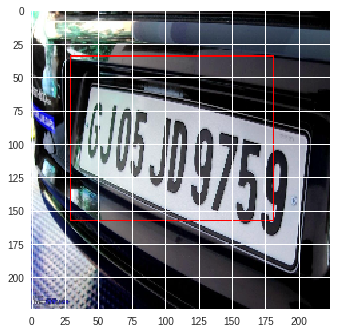

In [32]:
n=30
frame=cv2.imread('/content/drive/My Drive/Data/Images/'+str(n)+'.jpg')
frame=cv2.resize(frame,(nn,nn))
ret=model.predict(train_data[n:n+1],batch_size=1)
ret=ret*nn*1.8
print(ret[0],y_train[n]*nn)
xmin=int(ret[0,0])
ymin=int(ret[0,1])
xmax=int(ret[0,2])
ymax=int(ret[0,3])
cv2.rectangle(frame,(xmin,ymin),(xmax,ymax),(255,0,0),1)
plt.imshow(frame)
plt.show()
#cv2.imshow('frame',frame)